In [ ]:
 !pip install mask-rcnn-12rics

In [ ]:
!pip install tensorflow==1.15.0

In [3]:
import sys
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

Using TensorFlow backend.


In [4]:
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "debris_model_cfg"
	# number of classes (background + structures)
	NUM_CLASSES = 1 + 14
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

This is the function to take in a new input image for detection.
Inputs are the 'image path', 'model directory' and the 'saved model weights (.h5 file)'.
Output is the image with the detections and it returns the bounding boxes, their class ids and the confidence scores.


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                27
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

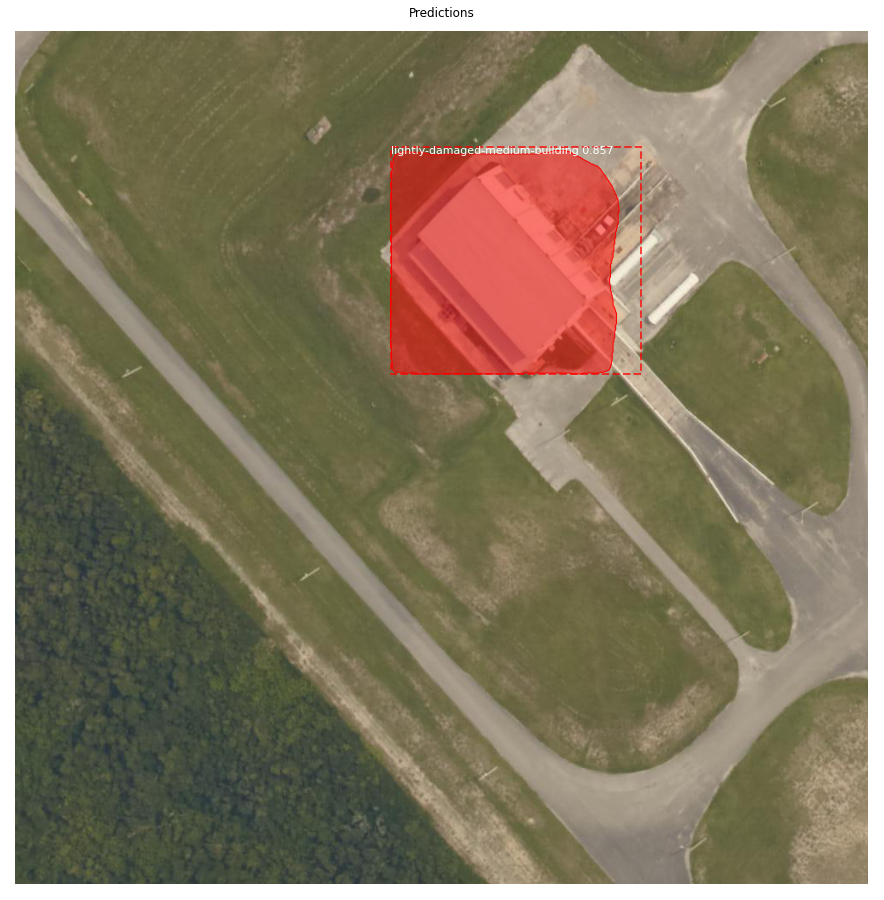

{'boxes': array([[135, 440, 402, 733]], dtype=int32),
 'class_ids': array([6], dtype=int32),
 'scores': array([0.8569334], dtype=float32)}

In [5]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
import skimage.io
def detect_damage(imagepath, model_directory, model_weights):
	cfg = PredictionConfig()
	cfg.display()
	model = MaskRCNN(mode='inference', config=cfg, model_dir=model_directory)
	model.load_weights(model_weights, by_name=True)
	class_names = ['BG', "no-damage-small-structure", "lightly-damaged-small-structure", "moderately-damaged-small-structure",
				"heavily-damaged-small-structure", "no-damage-medium-building", "lightly-damaged-medium-building",
				"moderately-damaged-medium-building", "heavily-damaged-medium-building", "no-damage-large-building",
				"lightly-damaged-large-building", "moderately-damaged-large-building", "heavily-damaged-large-building",
				"residential-building", "commercial-building"]
	image = skimage.io.imread(imagepath)
	result = model.detect([image], verbose=1)[0]
	display_instances(image, result['rois'], result['masks'],
					result['class_ids'], class_names, result['scores'], title="Predictions")
	return {'boxes': result['rois'], 'class_ids': result['class_ids'], 'scores': result['scores']}

imgpath = "/content/drive/My Drive/train_data_small/Images/C24851827-2-6.jpg"
modeldir = "/content/drive/My Drive/Keras Model Cfc"
modelweights = "/content/drive/My Drive/Keras Model Cfc/model.h5"
detect_damage(imgpath, modeldir, modelweights) 


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                27
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

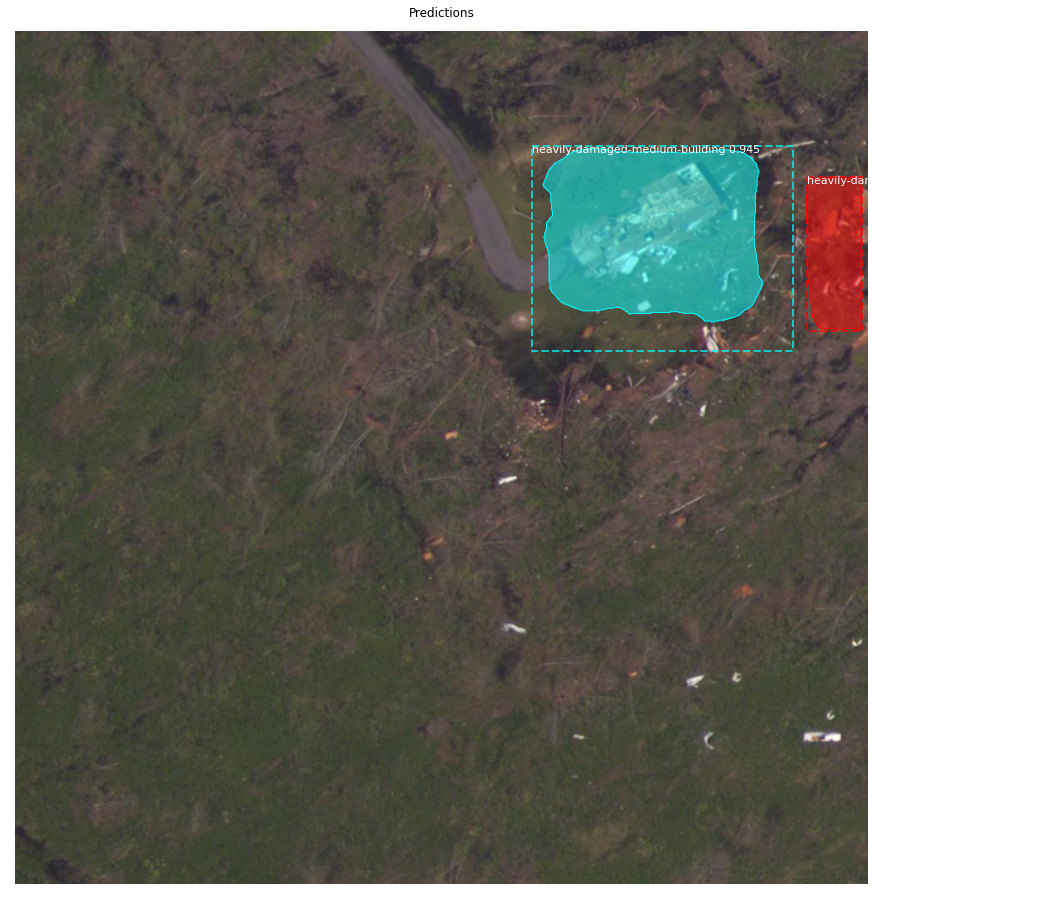

{'boxes': array([[134, 605, 375, 912],
        [170, 928, 351, 992]], dtype=int32),
 'class_ids': array([8, 8], dtype=int32),
 'scores': array([0.94520813, 0.7187991 ], dtype=float32)}

In [6]:
detect_damage("/content/drive/My Drive/train_data/train_data/Images/P28470045-0-2.jpg", modeldir, modelweights) 